<a href="https://colab.research.google.com/github/Miugleofo100/estrategia.produccion/blob/main/METODO_GRAFICO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ejemplo 1
Utiliza el método gráfico para resolver el siguiente problema tomado del **Tema 3, página 13**:

>Max. $z = 8x + 3y$
>
>Sujeto a:
>
>$30x + 25y \leq 480$
>
>$2x + 3y \leq 48$
>
>$30x + 8y \geq 148$
>
>$x - 4y \leq 3$
>
>$x + 1.5y \geq 10$
>
>$x,~y \geq 0$

In [2]:
import matplotlib.pyplot as plt
import numpy as np

z= 118.13793103448276


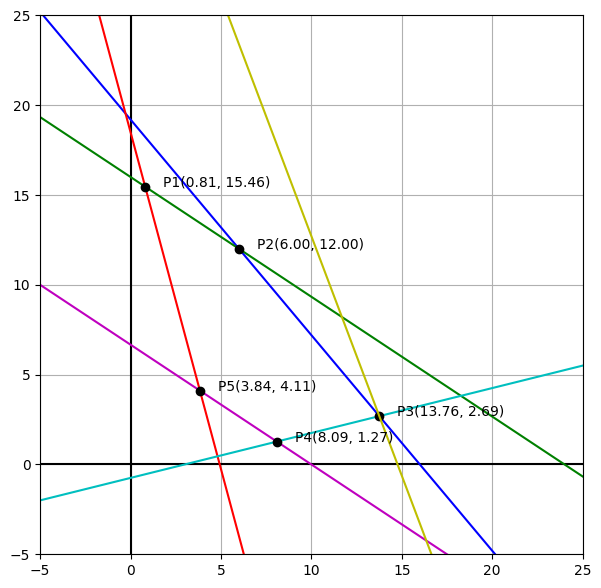

In [3]:
x_min = -5
x_max = 25
y_min = -5
y_max = 25
div_x = int((x_max - x_min)/5 + 1)
div_y = int((y_max - y_min)/5 + 1)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot()

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.grid()

ax.set_xticks(np.linspace(x_min, x_max, div_x))
ax.set_yticks(np.linspace(y_min, y_max, div_y))

plt.hlines(y=0, xmin=x_min, xmax=x_max, colors="k")
plt.vlines(x=0, ymin=y_min, ymax=y_max, colors="k")

x = np.linspace(x_min, x_max, 100)

y1 = (480 - 30*x)/25
ax.plot(x, y1, color="b")

y2 = (48 - 2*x)/3
ax.plot(x, y2, color="g")

y3 = (148 - 30*x)/8
ax.plot(x, y3, color="r")

y4 = (3 - x)/-4
ax.plot(x, y4, color="c")

y5 = (10 - x)/1.5
ax.plot(x, y5, color="m")

A1 = np.array([[2., 3], [30, 8]])
b1 = np.array([48, 148])
[x1, y1] = np.linalg.solve(A1, b1)
ax.plot(x1, y1, "o", color="k")
ax.text(x1 + 1, y1, "P1({:.2f}, {:.2f})".format(x1, y1))

A2 = np.array([[30, 25.], [2, 3]])
b2 = np.array([480, 48])
[x2, y2] = np.linalg.solve(A2, b2)
ax.plot(x2, y2, "o", color="k")
ax.text(x2 + 1, y2, "P2({:.2f}, {:.2f})".format(x2, y2))

A3 = np.array([[30, 25.], [1, -4]])
b3 = np.array([480, 3])
[x3, y3] = np.linalg.solve(A3, b3)
ax.plot(x3, y3, "o", color="k")
ax.text(x3 + 1, y3, "P3({:.2f}, {:.2f})".format(x3, y3))

A4 = np.array([[1, 1.5], [1, -4]])
b4 = np.array([10, 3])
[x4, y4] = np.linalg.solve(A4, b4)
ax.plot(x4, y4, "o", color="k")
ax.text(x4 + 1, y4, "P4({:.2f}, {:.2f})".format(x4, y4))

A5 = np.array([[1, 1.5], [30, 8]])
b5 = np.array([10, 148])
[x5, y5] = np.linalg.solve(A5, b5)
ax.plot(x5, y5, "o", color="k")
ax.text(x5 + 1, y5, "P5({:.2f}, {:.2f})".format(x5, y5))

z = 8*x3 + 3*y3
print("z=", z)
y_z = (z - 8*x)/3
ax.plot(x, y_z, color="y")

plt.show()

YO HICE SOLUCION 

### Caso Estrategia de produccion
Las maquinas Bodyplus100 y Bodyplus200:

>Max. $z = 2400x + 3500y$
>
>Sujeto a:
>
>$8x + 12y \leq 600$
>
>$5x + 10y \leq 450$
>
>$2x + 2y \geq 140$
>
>$x,~y \geq 0$

In [ ]:
#Import las bibliotecas necesarias 
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Configura los ejes 

x_min = -5
x_max = 25
y_min = -5
y_max = 25
div_x = int((x_max - x_min)/5 + 1)
div_y = int((y_max - y_min)/5 + 1)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot()

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.grid()

ax.set_xticks(np.linspace(x_min, x_max, div_x))
ax.set_yticks(np.linspace(y_min, y_max, div_y))

plt.hlines(y=0, xmin=x_min, xmax=x_max, colors="k")
plt.vlines(x=0, ymin=y_min, ymax=y_max, colors="k")

#Valores para la variable de decisión 

x = np.linspace(x_min, x_max, 100)

#Grafica de las restricciones 

#y1 = (480 - 30*x)/25
#ax.plot(x, y1, color="b")

#y2 = (48 - 2*x)/3
#ax.plot(x, y2, color="g")

#y3 = (148 - 30*x)/8
#ax.plot(x, y3, color="r")

#y4 = (3 - x)/-4
#ax.plot(x, y4, color="c")

#y5 = (10 - x)/1.5
#ax.plot(x, y5, color="m")

#A1 = np.array([[2., 3], [30, 8]])
#b1 = np.array([48, 148])
#[x1, y1] = np.linalg.solve(A1, b1)
#ax.plot(x1, y1, "o", color="k")
#ax.text(x1 + 1, y1, "P1({:.2f}, {:.2f})".format(x1, y1))

#A2 = np.array([[30, 25.], [2, 3]])
#b2 = np.array([480, 48])
#[x2, y2] = np.linalg.solve(A2, b2)
#ax.plot(x2, y2, "o", color="k")
#ax.text(x2 + 1, y2, "P2({:.2f}, {:.2f})".format(x2, y2))

#A3 = np.array([[30, 25.], [1, -4]])
#b3 = np.array([480, 3])
#[x3, y3] = np.linalg.solve(A3, b3)
#ax.plot(x3, y3, "o", color="k")
#ax.text(x3 + 1, y3, "P3({:.2f}, {:.2f})".format(x3, y3))

#A4 = np.array([[1, 1.5], [1, -4]])
#b4 = np.array([10, 3])
#[x4, y4] = np.linalg.solve(A4, b4)
#ax.plot(x4, y4, "o", color="k")
#ax.text(x4 + 1, y4, "P4({:.2f}, {:.2f})".format(x4, y4))

#A5 = np.array([[1, 1.5], [30, 8]])
#b5 = np.array([10, 148])
#[x5, y5] = np.linalg.solve(A5, b5)
#ax.plot(x5, y5, "o", color="k")
#ax.text(x5 + 1, y5, "P5({:.2f}, {:.2f})".format(x5, y5))

#z = 8*x3 + 3*y3
#print("z=", z)
#y_z = (z - 8*x)/3
#ax.plot(x, y_z, color="y")

#plt.show()